This is a simple notebook showing the basics of FTS interferogram and spectrum comparison. It is taken from comparing filtered versus unfiltered interferograms and their corresponding spectra. 

Mira

In [1]:
import matplotlib.pyplot as pl
import pickle
import numpy as np
import sys
%matplotlib inline

In [2]:
#X mirror,Old Septum; No Filter
with open( '../../data/raw_data/20160818_1441_I.1xII.2xIII.1.pkl' , 'rb') as file1:
    d1=pickle.load(file1, encoding = 'latin1')

#X mirror, New Septum; No Filter
with open( '../../data/raw_data/20160818_1514_I.4xII.2xIII.1.pkl' , 'rb') as file2:
    d2=pickle.load(file2, encoding = 'latin1')

#X mirror,Old Septum; 7icm filer
with open( '../../data/raw_data/20160818_1445_I.1xII.2xIII.13.pkl' , 'rb') as file3:
    d3=pickle.load(file3, encoding = 'latin1')

#X mirror, New Septum; No Filter
with open( '../../data/raw_data/20160818_1519_I.4xII.2xIII.13.pkl' , 'rb') as file4:
    d4=pickle.load(file4, encoding = 'latin1')

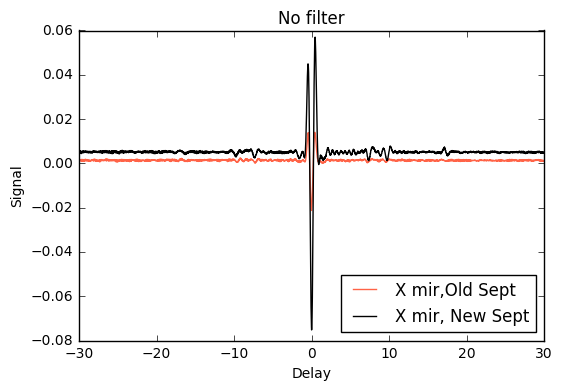

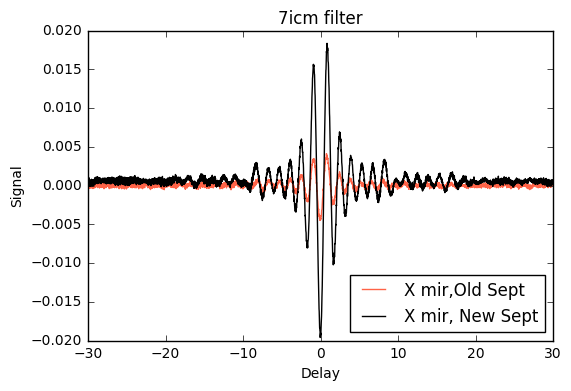

In [5]:
#Comparing with X mirror, New Septum; No Filter
X1=d1['delay0F']
Y1=d1['sig0F']

X2=d2['delay0F']
Y2=d2['sig0F']

X3=d3['delay0F']
Y3=d3['sig0F']

X4=d4['delay0F']
Y4=d4['sig0F']

Y1=Y1- np.mean(Y1[0:100])
Y2=Y2- np.mean(Y2[0:100])
Y3=Y3- np.mean(Y3[0:100])
Y4=Y4- np.mean(Y4[0:100])

Y1scale = Y1/(np.max(np.abs(Y1)))*(np.max(np.abs(Y2)))
Y3scale = Y3/(np.max(np.abs(Y3)))*(np.max(np.abs(Y4)))

pl.plot(X1,Y1,label='X mir,Old Sept', color='tomato')
pl.plot(X2,Y2,label='X mir, New Sept', color='k')
pl.xlim(-30,30)
pl.title('No filter')
pl.ylabel('Signal')
pl.xlabel('Delay')
pl.legend(loc='lower right')
pl.show()

pl.plot(X3,Y3,label='X mir,Old Sept', color='tomato')
pl.plot(X4,Y4,label='X mir, New Sept', color='k')
pl.xlim(-30,30)
pl.title('7icm filter')
pl.ylabel('Signal')
pl.xlabel('Delay')
pl.legend(loc='lower right')
pl.show()

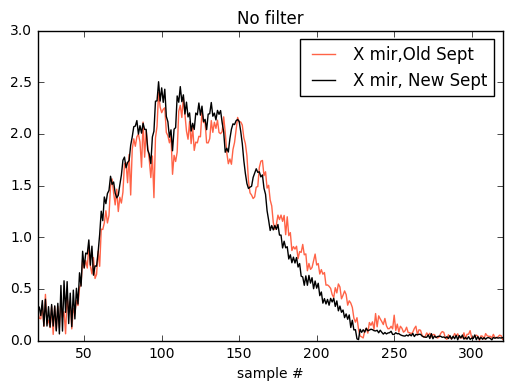

In [6]:
pl.plot(np.abs(np.fft.fft(Y1scale)),label='X mir,Old Sept', color='tomato')
pl.plot(np.abs(np.fft.fft(Y2)),label='X mir, New Sept', color='k')
pl.xlim(20, 320)
pl.ylim(0,3)
pl.title('No filter')
pl.legend()
pl.xlabel('sample #')
pl.show()

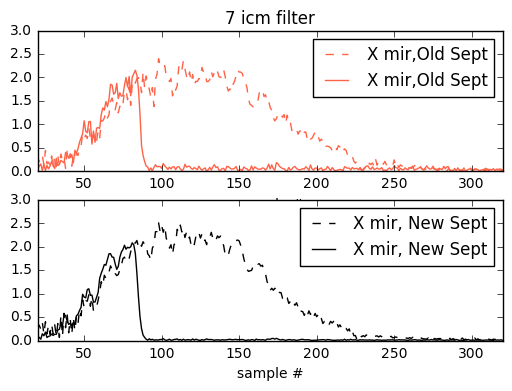

In [7]:
pl.subplot(2,1,1)
pl.plot(np.abs(np.fft.fft(Y1scale)),ls='--',label='X mir,Old Sept', color='tomato')
pl.plot(np.abs(np.fft.fft(Y3scale)),label='X mir,Old Sept', color='tomato')
pl.xlim(20, 320)
pl.ylim(0,3)
pl.title('7 icm filter')
pl.legend()
pl.xlabel('sample #')
pl.subplot(2,1,2)
pl.plot(np.abs(np.fft.fft(Y2)), ls= '--',label='X mir, New Sept', color='k')
pl.plot(np.abs(np.fft.fft(Y4)),label='X mir, New Sept', color='k')
pl.xlim(20, 320)
pl.ylim(0,3)

pl.legend()
pl.xlabel('sample number')
pl.show()